### install h5py

In [1]:
!pip install h5py

### create neural network with **h5py** library

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [6]:
def load_data():
    train_dataset = h5py.File('/content/drive/MyDrive/DataFrames/cat_dog_dataset/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/MyDrive/DataFrames/cat_dog_dataset/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test

In [7]:
X_train, y_train, X_test, y_test= load_data()

In [8]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts= True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


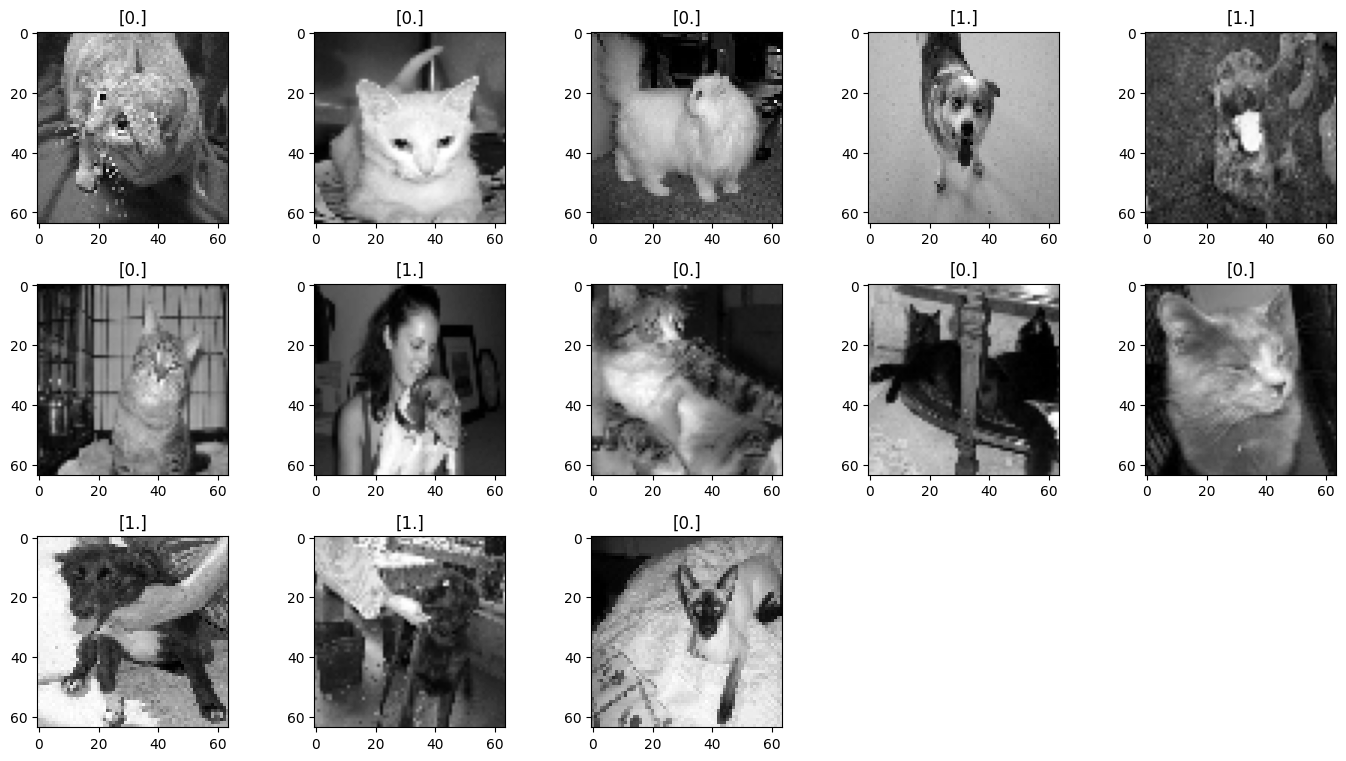

In [13]:
plt.figure(figsize= (14, 10))
for i in range(1, 14):
  plt.subplot(4, 5, i)
  plt.imshow(X_train[i], cmap= 'gray')
  plt.title(y_train[i])
  plt.tight_layout()
plt.show()

### import kaggle dataset's API

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [15]:
!kaggle datasets download -d tongpython/cat-and-dog

 94% 205M/218M [00:02<00:00, 87.6MB/s]
100% 218M/218M [00:02<00:00, 83.6MB/s]


In [16]:
import zipfile
zip_ref= zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [20]:
# generators
train_set= keras.utils.image_dataset_from_directory(
    directory= '/content/content/training_set/training_set',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256, 256)
)

validation_set= keras.utils.image_dataset_from_directory(
    directory= '/content/content/test_set/test_set',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256, 256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [21]:
# normalize
def process(image, label):
  image= tf.cast(image/255., tf.float32)
  return image, label

train_set= train_set.map(process)
validation_set= validation_set.map(process)

In [25]:
# create a CNN model
model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2), strides= 2, padding= 'valid'))

model.add(Conv2D(128, kernel_size= (3, 3), padding= 'valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2), strides= 2, padding= 'valid'))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [28]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [29]:
model.fit(train_set, epochs= 10, validation_data= validation_set)

Epoch 1/10
251/251 [==============================] - 1350s 5s/step - loss: 0.6771 - accuracy: 0.5741 - val_loss: 0.6224 - val_accuracy: 0.6362
Epoch 2/10
251/251 [==============================] - 1345s 5s/step - loss: 0.6241 - accuracy: 0.6497 - val_loss: 0.6164 - val_accuracy: 0.6520
Epoch 3/10
251/251 [==============================] - 1375s 5s/step - loss: 0.5507 - accuracy: 0.7169 - val_loss: 0.6405 - val_accuracy: 0.6742
Epoch 4/10
251/251 [==============================] - 1330s 5s/step - loss: 0.4570 - accuracy: 0.7800 - val_loss: 0.7637 - val_accuracy: 0.6317
Epoch 5/10
251/251 [==============================] - 1363s 5s/step - loss: 0.3257 - accuracy: 0.8551 - val_loss: 0.7971 - val_accuracy: 0.7410
Epoch 6/10
251/251 [==============================] - 1334s 5s/step - loss: 0.2195 - accuracy: 0.9074 - val_loss: 0.8188 - val_accuracy: 0.7123
Epoch 7/10
251/251 [==============================] - 1328s 5s/step - loss: 0.1120 - accuracy: 0.9542 - val_loss: 1.2956 - val_accuracy:

### test the module

In [31]:
import cv2

In [48]:
test_img= cv2.imread("/content/grey-cat.jpg")

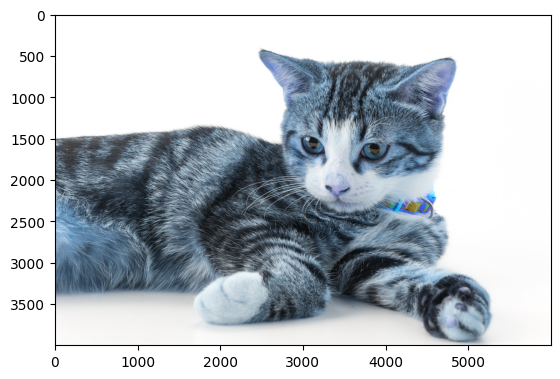

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(4000, 6000, 3)

#### resize the image

In [51]:
test_img= cv2.resize(test_img, (256, 256))

In [52]:
test_input= test_img.reshape((1, 256, 256, 3))

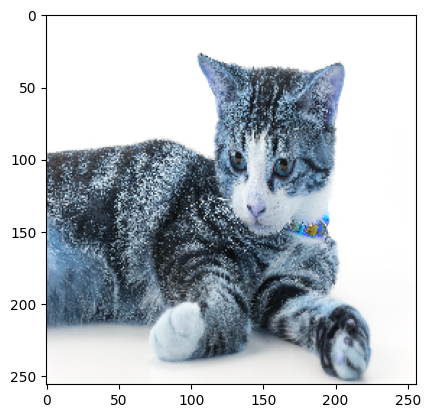

In [53]:
plt.imshow(test_img)

#### test the model by this image

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 64ms/step


array([[0.]], dtype=float32)